<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/2%EC%A3%BC%EC%B0%A8/%EC%8B%AC%EC%A7%88%ED%99%98_%ED%99%98%EC%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

# 심장 질환 환자 예측



In [3]:
!kaggle competitions download -c 2021-ml-midterm-p1

  0% 0.00/360 [00:00<?, ?B/s]
100% 360/360 [00:00<00:00, 729kB/s]
  0% 0.00/9.68k [00:00<?, ?B/s]
100% 9.68k/9.68k [00:00<00:00, 17.9MB/s]
  0% 0.00/2.38k [00:00<?, ?B/s]
100% 2.38k/2.38k [00:00<00:00, 2.13MB/s]


In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submit.csv')

In [5]:
train.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     242 non-null    int64  
 1   age       242 non-null    int64  
 2   sex       242 non-null    int64  
 3   cp        242 non-null    int64  
 4   trestbps  242 non-null    int64  
 5   chol      242 non-null    int64  
 6   fbs       242 non-null    int64  
 7   restecg   242 non-null    int64  
 8   thalach   242 non-null    int64  
 9   exang     242 non-null    int64  
 10  oldpeak   242 non-null    float64
 11  slope     242 non-null    int64  
 12  ca        242 non-null    object 
 13  thal      242 non-null    object 
 14  target    242 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 28.5+ KB


In [8]:
train.isna().sum()

index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 간단한 전처리

- object형식 int로 바꿔주기
- index 삭제

In [14]:
train['ca'].value_counts()


0    144
1     53
2     28
3     16
?      1
Name: ca, dtype: int64

In [15]:
train['thal'].value_counts()

3    137
7     90
6     14
?      1
Name: thal, dtype: int64

둘다 물음표를 다른 항목으로 바꿔준 후 전처리 

In [17]:
train.loc[train['ca']=='?']=0

In [18]:
train.loc[train['thal']=='?']=3

In [22]:
train['ca'].value_counts()


0    144
1     53
2     28
3     17
Name: ca, dtype: int64

In [23]:
train['thal'].value_counts()

3    138
7     89
6     14
0      1
Name: thal, dtype: int64

In [21]:
train=train.astype({'ca':'int','thal':'int'})

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     242 non-null    int64  
 1   age       242 non-null    int64  
 2   sex       242 non-null    int64  
 3   cp        242 non-null    int64  
 4   trestbps  242 non-null    int64  
 5   chol      242 non-null    int64  
 6   fbs       242 non-null    int64  
 7   restecg   242 non-null    int64  
 8   thalach   242 non-null    int64  
 9   exang     242 non-null    int64  
 10  oldpeak   242 non-null    float64
 11  slope     242 non-null    int64  
 12  ca        242 non-null    int64  
 13  thal      242 non-null    int64  
 14  target    242 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 28.5 KB


test도 똑같이 해준다. 

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     61 non-null     int64  
 1   age       61 non-null     int64  
 2   sex       61 non-null     int64  
 3   cp        61 non-null     int64  
 4   trestbps  61 non-null     int64  
 5   chol      61 non-null     int64  
 6   fbs       61 non-null     int64  
 7   restecg   61 non-null     int64  
 8   thalach   61 non-null     int64  
 9   exang     61 non-null     int64  
 10  oldpeak   61 non-null     float64
 11  slope     61 non-null     int64  
 12  ca        61 non-null     object 
 13  thal      61 non-null     object 
dtypes: float64(1), int64(11), object(2)
memory usage: 6.8+ KB


In [26]:
test['ca'].value_counts()

0    32
1    12
2    10
3     4
?     3
Name: ca, dtype: int64

In [27]:
test['thal'].value_counts()

3    29
7    27
6     4
?     1
Name: thal, dtype: int64

In [28]:
test.loc[test['ca']=='?']=0
test.loc[test['thal']=='?']=3

In [30]:
train.drop('index',inplace=True,axis=1)
test.drop('index',inplace=True,axis=1)

## EDA

In [32]:
train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

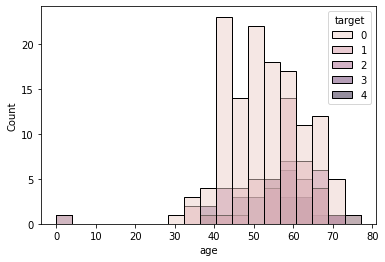

In [35]:
sns.histplot(train,x='age',hue='target')

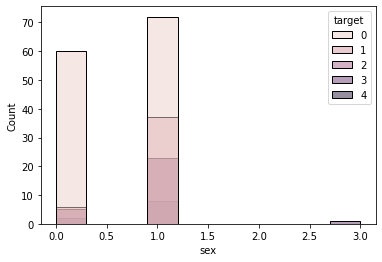

In [36]:
sns.histplot(train,x='sex',hue='target')

In [37]:
train['sex'].value_counts()

1    163
0     78
3      1
Name: sex, dtype: int64

3은 뭘까...? 역시 편견을 가져서는 안된다. 0은 여성, 1은 남성이다. 하지만 3은 이상치데이터인거 같으니 남자로 만들어버려야겠다.

In [38]:
train.loc[train['sex']==3]=1

In [39]:
test['sex'].value_counts()

1    38
0    22
3     1
Name: sex, dtype: int64

In [40]:
test.loc[test['sex']==3]=1

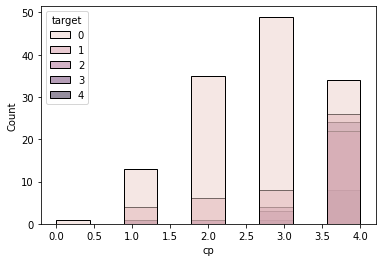

In [41]:
sns.histplot(train,x='cp',hue='target')

흉통 유형이 4인 경우 심질환 환자들이 많이 보임

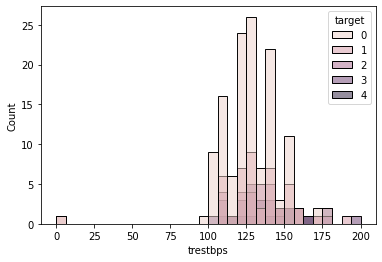

In [44]:
sns.histplot(train,x='trestbps',hue='target')

휴식혈압이 높을 수록 심질환 환자의 빈도가 커짐

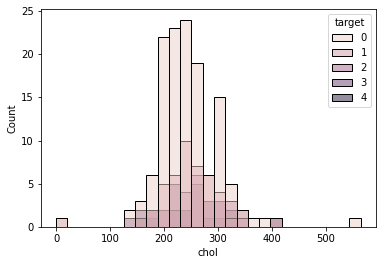

In [45]:
sns.histplot(train,x='chol',hue='target')

혈청 콜레스트롤과의 관계는 잘 모르겠군

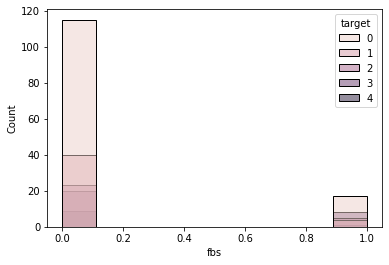

In [46]:
sns.histplot(train,x='fbs',hue='target')

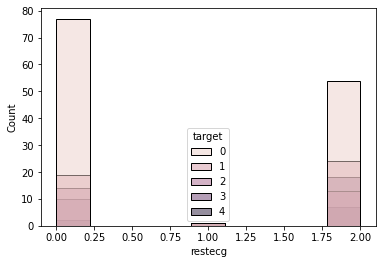

In [47]:
sns.histplot(train,x='restecg',hue='target')

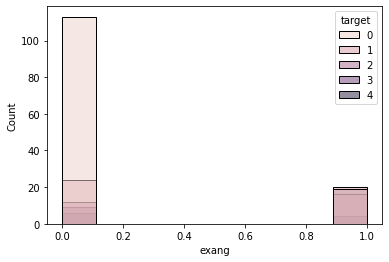

In [48]:
sns.histplot(train,x='exang',hue='target')

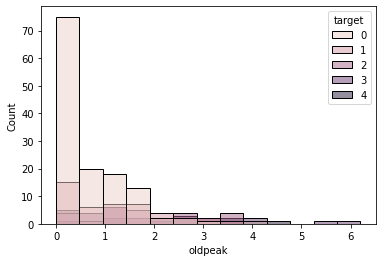

In [49]:
sns.histplot(train,x='oldpeak',hue='target')

심전도의 비정상 측정의 경우 관계가 커보임.커질수록 심질환 환자의 여부도 커짐

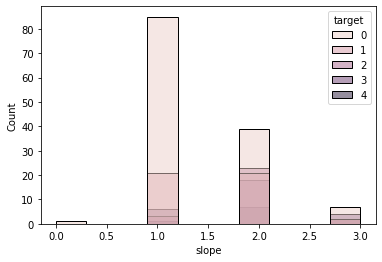

In [50]:
sns.histplot(train,x='slope',hue='target')

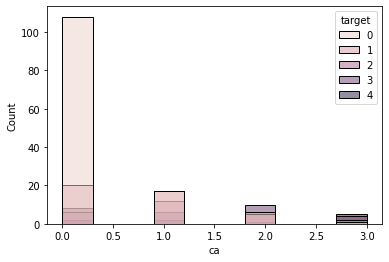

In [51]:
sns.histplot(train,x='ca',hue='target')

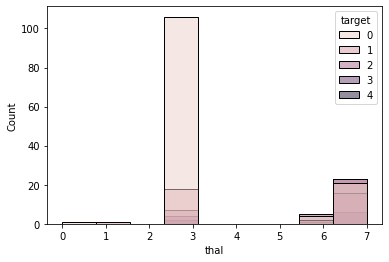

In [52]:
sns.histplot(train,x='thal',hue='target')

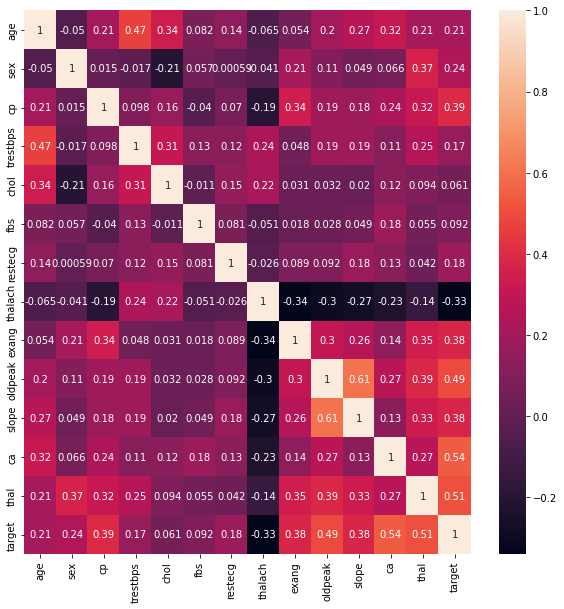

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

ca와 thal이 관계가 커보임

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train=train.drop('target',axis=1)
y_train=train['target']



In [62]:
X_test=test

## 로지스틱 회귀

In [63]:
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 3, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 1, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 0, 3, 1, 0])

In [64]:
lr_sample=sample.copy()
lr_sample['target']=pred.astype('int')
lr_sample.to_csv('lr.csv', index=False)

## KNN

In [66]:
knn=KNeighborsClassifier(5)#k=5로 지정. 
knn.fit(X_train,y_train)
k_pred=knn.predict(X_test)

In [68]:
knn_sample=sample.copy()
knn_sample['target']=k_pred.astype('int')
knn_sample.to_csv('knn.csv', index=False)

In [69]:
k_pred

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1,
       1, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

## 랜덤 포레스트

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100,max_depth=4,min_samples_leaf=3)
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)

In [71]:
rf_sample=sample.copy()
rf_sample['target']=rf_pred.astype('int')
rf_sample.to_csv('rf.csv', index=False)

In [72]:
rf_pred

array([0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 3,
       3, 0, 0, 3, 0, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0])

## 하이퍼파라미터 튜닝을 한 랜덤포레스트

In [73]:
rf1_clf=RandomForestClassifier(n_estimators=100,max_depth=4,min_samples_leaf=3)
rf1_clf.fit(X_train,y_train)
rf1_pred=rf1_clf.predict(X_test)

In [74]:
rf1_sample=sample.copy()
rf1_sample['target']=rf1_pred.astype('int')
rf1_sample.to_csv('rf1.csv', index=False)

In [75]:
rf1_pred

array([0, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,
       3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0])

리더보드를 보니 하이퍼파라미터 튜닝을 한 랜덤포레스트가 가장 성능이 좋았고 그다음은 로지스틱회귀, 아무것도 안한 랜덤포레스트, knn순으로 좋았다. 역시 트리기반 앙상블 모델이 성능이 좋게 나오는 분류 문제인듯. 그렇다면 XGBoost는 더 좋게 나오지 않을 까!?!

<궁금한 점>
- y_test가 없을 경우 하이퍼파라미터 튜닝을 통해 정확도를 판단할떄는 내가 가진 데이터를 임의적으로 나누어서(train_test_split) 판단하는게 맞는 걸까??
- 성능을 높이기 위해 우리가 더 할 수 있는 것에는 무엇이 있을까?

In [77]:
from xgboost import XGBClassifier


In [78]:

xgb_wrapper=XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train)
w_preds=xgb_wrapper.predict(X_test)

ValueError: ignored

도와줘요 오류!!